In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as skl 
from sklearn import datasets

from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris

from sklearn.linear_model import LogisticRegression

In [11]:
#загружаем датасет iris 
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [57]:
X = df.iloc[:,:-1]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)



1.0

C:\Users\Denis\AppData\Local\Temp\ipykernel_12808\30727237.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grid = np.c_[np.full(xx.ravel().shape, X_mean[0]), np.full(xx.ravel().shape, X_mean[1]),xx.ravel(),yy.ravel()]
C:\Users\Denis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


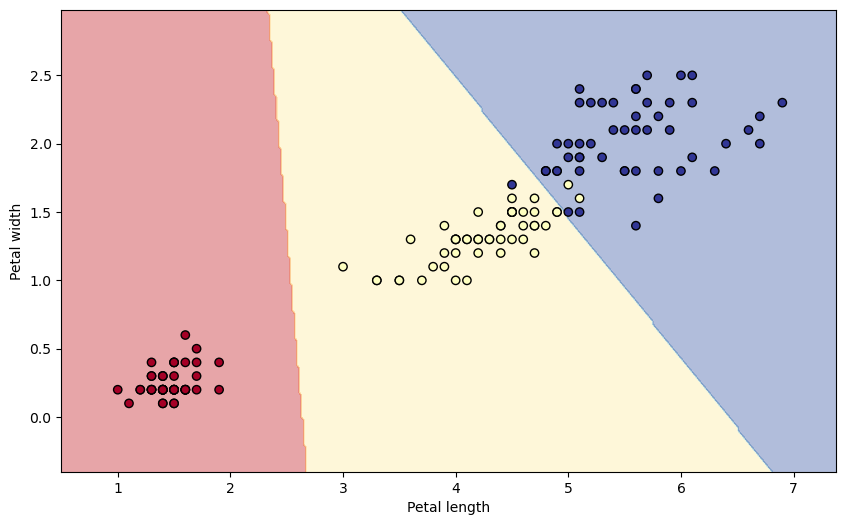

In [69]:
h = 0.02
x_min, x_max = X.iloc[:, 2].min() - 0.5, X.iloc[:, 2].max() + 0.5
y_min, y_max = X.iloc[:, 3].min() - 0.5, X.iloc[:, 3].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_mean = X.mean(axis=0)
grid = np.c_[np.full(xx.ravel().shape, X_mean[0]), np.full(xx.ravel().shape, X_mean[1]),xx.ravel(),yy.ravel()]                             

pred_grid = clf.predict(grid)
pred_grid = pred_grid.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, pred_grid, alpha=0.4, cmap=plt.cm.RdYlBu)
scatter = plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.show()